In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')
calendar_df = pd.read_csv('calendar.csv')

# Question 1: How does pricing vary across different neighborhoods in Seattle?

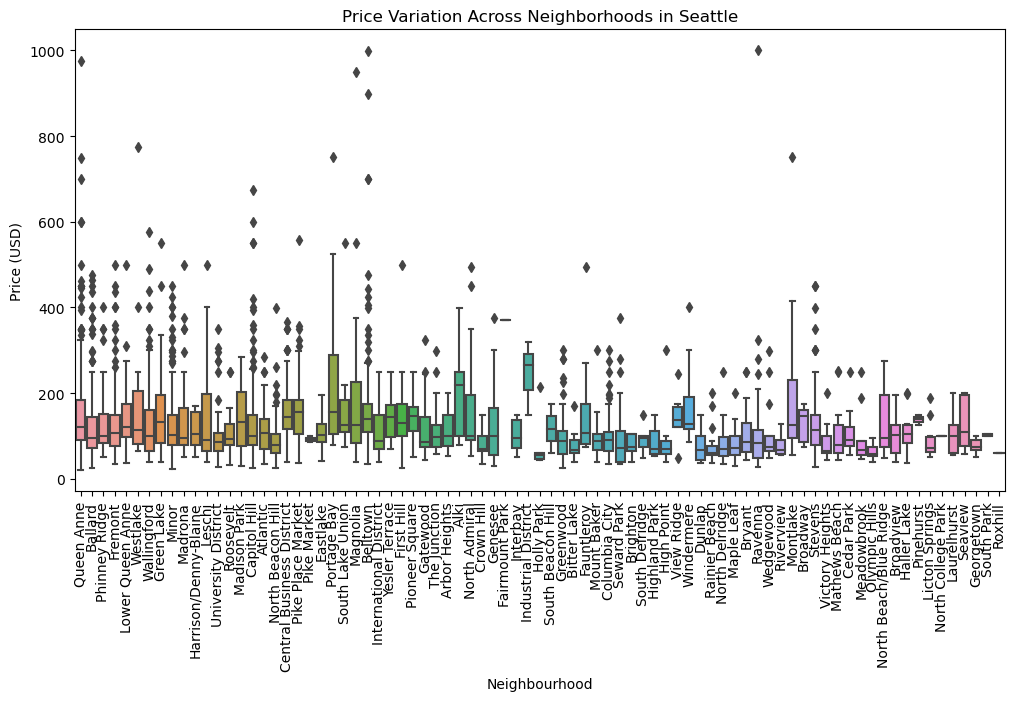

In [3]:
# Clean the price column by removing '$' and ',' and converting it to float
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Plot the boxplot showing price variation across neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood', y='price', data=listings_df)
plt.title('Price Variation Across Neighborhoods in Seattle')
plt.xlabel('Neighbourhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.show()

# Question 2: What are the most influential factors affecting rental prices?

Top correlated features with price:
price                        1.000000
accommodates                 0.652218
bedrooms                     0.627720
beds                         0.589525
square_feet                  0.531752
bathrooms                    0.516424
guests_included              0.392875
host_listings_count          0.093962
host_total_listings_count    0.093962
review_scores_location       0.075069
Name: price, dtype: float64


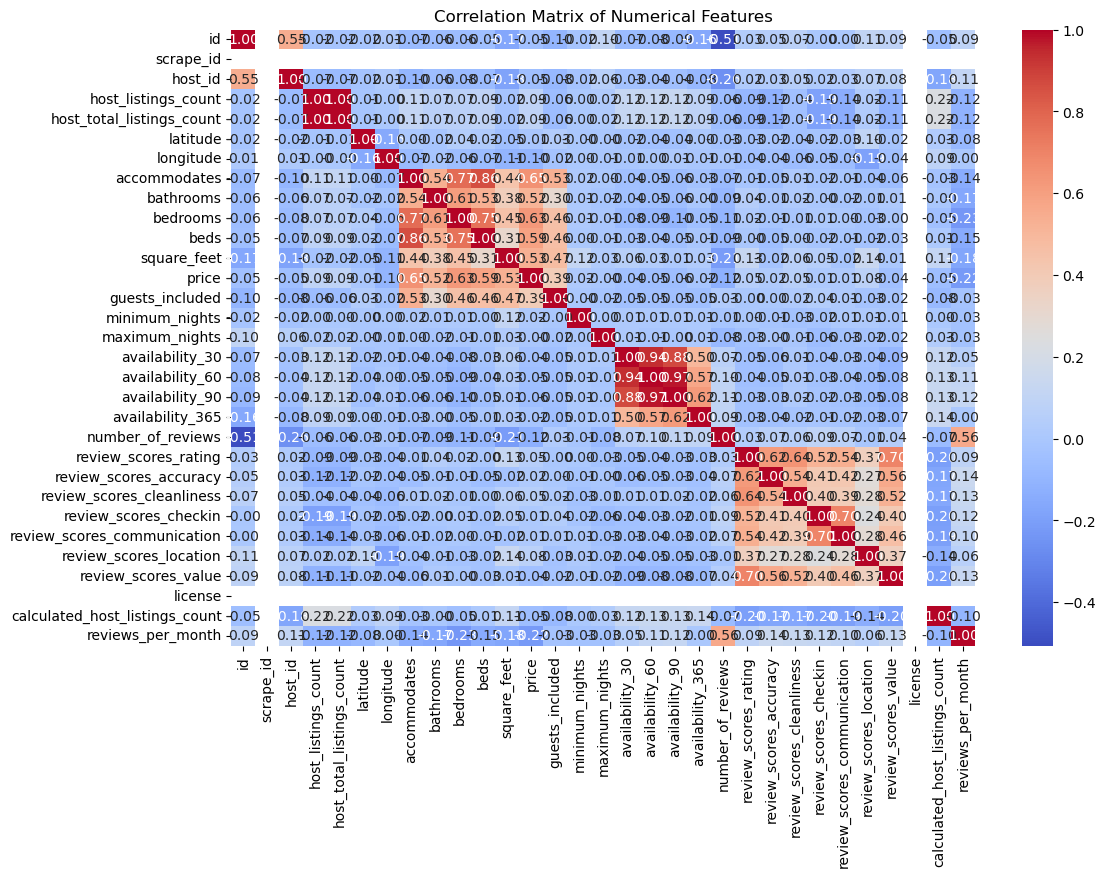

In [6]:
# For this question, we can perform a correlation analysis between price and other numerical features
correlation_matrix = listings_df.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Display the top correlated features
print("Top correlated features with price:")
print(price_correlation.head(10))

# Plot a heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

 # Question 3: How do guests rate their Airbnb experiences, and what aspects contribute to overall satisfaction?

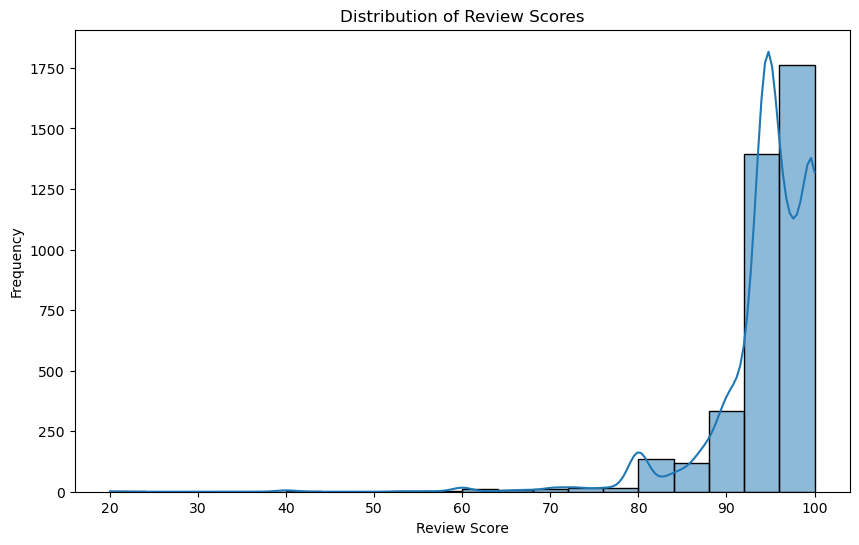

In [5]:
# Clean the review_scores_rating column by filling missing values with the mean
listings_df['review_scores_rating'] = listings_df['review_scores_rating'].fillna(listings_df['review_scores_rating'].mean())

# Plot a histogram of review scores
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['review_scores_rating'], bins=20, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()